# Laser pulse propagation in optical fiber

The **fractional nonlinear Schrödinger equation (FNLSE)** with a **Caputo fractional derivative in the spatial variable $z$**:

$$
\frac{\partial^\alpha A}{\partial z^\alpha} = 
- \frac{\alpha_{\alpha}}{2}A
+ \frac{\beta_{2,\alpha}}{2} \frac{\partial^2 A}{\partial T^2} 
- \gamma_\alpha |A|^2A
$$

$$
\alpha_\alpha = i \alpha_{att} \beta_0^{(1-\alpha)} e^{-i\alpha \frac{\pi}{2}}
$$

$$
\beta_{2,\alpha} = \beta_2 \beta_0^{(1-\alpha)} e^{-i\alpha \frac{\pi}{2}}
$$

$$
\gamma_\alpha = \frac{n_2 \omega_0 }{c A_\text{eff}} \beta_0^{(1-\alpha)} e^{-i\alpha \frac{\pi}{2}}
$$

subject to the initial condition

$$
A(0, t) = A_0(t) = A_p \exp\left(-\frac{t^2}{2T_0^2} + i C t^2\right), \quad T_0 = \frac{\text{FWHM}}{2 \sqrt{\ln 2}},
$$

Is there existing a method if I know the exact solution for each term separately (attenuation, GVD, SPM), can we build numerically somehow the total solution?

The short answer is: Yes.

What we're describing is a **splitting method**, a well-known approach in computational physics for **combining known exact solutions** of separate terms into an approximate **total solution** of a full evolution equation. In the context of our **fractional nonlinear Schrödinger equation (f-NLSE)**, this is absolutely possible.

---

## 🔧 Problem Setup

Each term:

* **Attenuation-only**: in the time domain:
  $$
    A(z, t) = A_p \exp\left(-\frac{t^2}{2 T_0^2} + i C t^2\right) \cdot E_\alpha(- \frac{\alpha_{\alpha}}{2} z^\alpha)
  $$
* **GVD-only (Dispersion)**: in Fourier domain
  $$
    \hat{A}(z, \omega) = \hat{A}_0(\omega) \cdot E_\alpha\left(- \frac{\beta_{2,\alpha}}{2} \omega^2 z^\alpha \right)
  $$

  $$
    \hat{A}_0(\omega) = A_p T_0 \sqrt{2\pi} \cdot \frac{1}{\sqrt{1 - 2i C T_0^2}} \exp\left( -\frac{T_0^2 \omega^2}{2 (1 - 2i C T_0^2)} \right).
  $$
* **SPM-only (Kerr effect)**: in the time domain
  $$
    A(z, t) = A_0(t) \cdot E_\alpha\left(- \gamma_\alpha |A_0(t)|^2 z^\alpha\right), 
  $$

---

## 🧠 The Idea: **Operator Splitting for Fractional z-evolution**

In the classical (non-fractional) NLSE, the **Split-Step Fourier Method (SSFM)** is the standard approach:

1. Split the equation into **linear** and **nonlinear** parts.
2. Use exact solutions of each for a small step $\Delta z$.
3. Alternate them (symmetrically or asymmetrically) to approximate full evolution.

### ✅ For fractional derivative ($\alpha < 1$), we can adapt this idea:

* Instead of propagating over $\Delta z$, we propagate using **fractional evolution weights**.
* Each component (attenuation, dispersion, SPM) is evolved independently **using their Mittag-Leffler-based evolution**, and then combined.

---

## 🧪 Proposed Numerical Strategy (Fractional Operator Splitting)

At each small step $z \rightarrow z + \Delta z$, approximate:

$$
A(z + \Delta z, t) \approx \mathcal{S}_{\text{SPM}}^{(\alpha)} \circ \mathcal{S}_{\text{Disp}}^{(\alpha)} \circ \mathcal{S}_{\text{Att}}^{(\alpha)}[A(z, t)]
$$

Where each $\mathcal{S}_j^{(\alpha)}$ is the **Mittag-Leffler evolution operator** for that term over $\Delta z^\alpha$.

Since we know the frequency-dependent (Fourier transformed) solution of the GVD-only case, we can exploit it in the dispersion step.

---


## ⚠️ Important Caveats

1. **Fractional z-evolution is not semigroup-like**:
   So splitting over $\Delta z$ is **not mathematically rigorous** the way it is for integer-order PDEs. But numerically, it **still works well** for small steps.

2. **Symmetric splitting** (like Strang splitting) will usually yield better results.
---

## ✅ When This Works Well

This strategy is justified **when**:

* We know the exact solution of each term.
* $\alpha$ is close to 1 (so memory effects are weaker).
* We use **small propagation steps**.
* We validate it by comparison to full Caputo integration (as we’ve done).



1 % ready
2 % ready
3 % ready
4 % ready
5 % ready
6 % ready
7 % ready
8 % ready
9 % ready
10 % ready
11 % ready
12 % ready
13 % ready
14 % ready
15 % ready
16 % ready
17 % ready
18 % ready
19 % ready
20 % ready
21 % ready
22 % ready
23 % ready
24 % ready
25 % ready
26 % ready
27 % ready
28 % ready
29 % ready
30 % ready
31 % ready
32 % ready
33 % ready
34 % ready
35 % ready
36 % ready
37 % ready
38 % ready
39 % ready
40 % ready
41 % ready
42 % ready
43 % ready
44 % ready
45 % ready
46 % ready
47 % ready
48 % ready
49 % ready
50 % ready
51 % ready
52 % ready
53 % ready
54 % ready
55 % ready
56 % ready
57 % ready
58 % ready
59 % ready
60 % ready
61 % ready
62 % ready
63 % ready
64 % ready
65 % ready
66 % ready
67 % ready
68 % ready
69 % ready
70 % ready
71 % ready
72 % ready
73 % ready
74 % ready
75 % ready
76 % ready
77 % ready
78 % ready
79 % ready
80 % ready
81 % ready
82 % ready
83 % ready
84 % ready
85 % ready
86 % ready
87 % ready
88 % ready
89 % ready
90 % ready
91 % ready
92 % rea

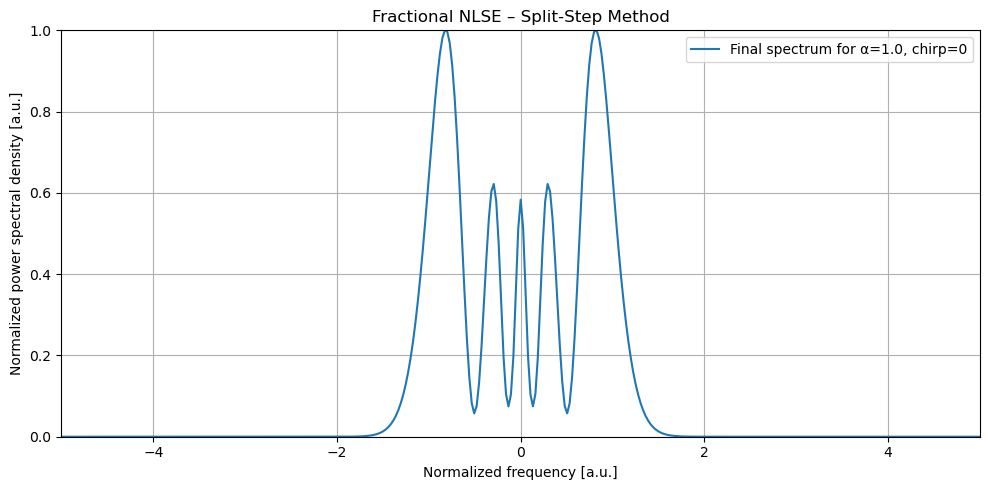

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, ifftshift, fftfreq
from scipy.special import gamma
import warnings
warnings.filterwarnings("error")

# constants
speed_of_light=3*1e8                                        # Speed of light [m/s]
epsilon_0 = 8.854187817e-12                                 # Farads per meter (F/m)
refractive_index = 1.453317                                 # refractive index of fused silica for 800nm

# Defining parameters for the simulation
# Initialize Gaussian pulse parameters (OCTAVIUS-85M-HP from THORLABS) https://www.thorlabs.com/thorproduct.cfm?partnumber=OCTAVIUS-85M-HP
wavelength0=800*1e-9                                        # Pulse central wavelengt [m]
frequency0=speed_of_light/wavelength0                       # Pulse central frequency [Hz] 0.375*1e15 Hz = 0.375 PHz which equals to 800 nm
omega0=2*np.pi*frequency0                                   # Pulse central angular frequency [rad/s]
duration_FWHM=8*1e-15                                       # Pulse duration in FWHM [s]
duration=duration_FWHM / (2 * np.sqrt(np.log(2)))
repetition_frequency=85*1e6                                 # Pulse repetition frequency [Hz]
average_power=600*1e-3                                      # Pulse average power [W]
pulse_energy=average_power/repetition_frequency             # Pulse energy [J]
peak_power=pulse_energy/duration_FWHM                       # Pulse peak power [W]
amplitude=np.sqrt(peak_power)                               # Electrical field strength amplitude in units of sqrt(W)
N=2**10 #2**10                                              # Number of points                                                    
Time_window=100e-15                                         # Time window [s]
chirp = 0                                                   # Chirp parameter
alpha = 1.0                                                 # Fractional order

# Defining the parameters of the fiber
nsteps=2**10 #2**11                                                                   # Number of steps we divide the fiber into
effective_mode_diameter=5e-6                                                          # Effective mode diameter [m] from https://www.thorlabs.com/thorproduct.cfm?partnumber=780HP
effective_mode_area=(np.pi/4)*effective_mode_diameter**2                              # Effective mode area [m^2]
nonlinear_refractive_index=2.7*1e-20                                                  # Nonlinear refractive index [m^2/W] of fused silica @ 800 nm from https://opg.optica.org/oe/fulltext.cfm?uri=oe-27-26-37940&id=424534
gammaconstant=(2*np.pi*nonlinear_refractive_index)/(wavelength0*effective_mode_area)  # Nonlinear parameter [1/(W*m)]
beta0 = refractive_index * (omega0/speed_of_light)                                    # Wavenumber [1/m]
phase = beta0**(1-alpha) * np.exp(-1j * np.pi * alpha / 2)
gammaconstantwithphase = gammaconstant * phase
beta2=36.16                                                                           # GVD in fs^2/mm (units typically used when referring to beta2) of fused silica @ 800nm from https://www.newport.com/n/the-effect-of-dispersion-on-ultrashort-pulses
beta2*=(1e-30)                                                                        # Convert GVD to s^2/m so everything is in SI units of fused silica @ 800nm
beta2withphase = beta2 * phase
alpha_dB_per_m=0.2*1e-3                                                               # Power attenuation coeff in decibel per m. Usual value @ 1550 nm is 0.2 dB/km 
alpha_dB_per_m_withphase = alpha_dB_per_m * phase *1j
beta2=0                                                                               # Convert GVD to s^2/m so everything is in SI units of fused silica @ 800nm
alpha_dB_per_m=0 

# Some useful parameters
nonlinear_length=1/(gammaconstant*peak_power)

# Prppagation distance
z = 4.5 * np.pi * nonlinear_length                          # Propagation distance [m]

# Time and frequency grid
t = np.linspace(-Time_window/2,Time_window/2,N)                                                                                  
dt = abs(t[1] - t[0])                                   
f = fftshift(fftfreq(N,d=dt))
omega = f * 2 * np.pi 

# spatial step
dz = z / nsteps 
z_grid = np.linspace(0, z, nsteps+1)

# Functions
def getPower(amplitude):
    return np.abs(amplitude) ** 2

def chirpedGaussianPulseTime(time,amplitude,duration,chirp):
    return amplitude*np.exp(-((1+1j*chirp)/2)*(time/duration)**2)

def getSpectrumFromPulse(time,pulse_amplitude):
    dt=time[1]-time[0]
    spectrum_amplitude=fftshift(fft(pulse_amplitude))*dt # Take FFT and do shift
    return spectrum_amplitude

def mittag_leffler(z, alpha, terms=100):
    out = np.zeros_like(z, dtype=np.complex128)
    for k in range(terms):
        out += z**k / gamma(alpha * k + 1)
    return out

# Initiate solution array
A = np.zeros((nsteps + 1, N), dtype=complex)
A[0, :] = chirpedGaussianPulseTime(t,amplitude,duration,chirp)
A0 = A[0, :]

# -----------------------------
# Split-Step Operators
# -----------------------------
def attenuation_step(Ain, dz, alpha):
    #arg = - alpha_dB_per_m_withphase / 2 * dz**alpha
    arg = - alpha_dB_per_m / 2 * dz**alpha
    return Ain * mittag_leffler(arg, alpha)

def dispersion_step(Ain, dz, alpha):
    A_fft = fftshift(fft(ifftshift(Ain)))
    #arg = 1j * beta2withphase * omega**2 / 2 * dz**alpha
    arg = 1j * beta2 * omega**2 / 2 * dz**alpha
    dispersion = mittag_leffler(arg, alpha)
    A_fft *= dispersion
    Aout = fftshift(ifft(ifftshift(A_fft)))
    return Aout

def spm_step(Ain, dz, alpha):
    intensity = np.abs(Ain)**2
    #arg = 1j * gammaconstant * intensity * dz**alpha
    arg = - gammaconstantwithphase * intensity * dz**alpha
    return Ain * mittag_leffler(arg, alpha)

# -----------------------------
# Main Propagation Loop (Strang splitting)
# -----------------------------
for n in range(nsteps):
    A1 = spm_step(A[n, :], dz / 2, alpha)
    A2 = dispersion_step(A1, dz, alpha)
    A3 = spm_step(A2, dz / 2, alpha)
    A4 = attenuation_step(A3, dz, alpha)
    A[n+1, :] = A4
    delta = int(round(n*100/nsteps)) - int(round((n-1)*100/nsteps))
    if delta == 1:
        print(str(int(round(n*100/nsteps))) + " % ready")

# -----------------------------
# Visualization
# -----------------------------
A_final = A[-1, :]
A0_spectrum = getSpectrumFromPulse(t,A0)
A_final_spectrum = getSpectrumFromPulse(t,A_final)

plt.figure(figsize=(10, 5))
#plt.plot(omega/omega0, getPower(A0_spectrum) / np.max(getPower(A0_spectrum)), '--', label="Initial spectrum")
#plt.plot(omega/omega0, getPower(A_final_spectrum) / np.max(getPower(A0_spectrum)), label=f"Final spectrum for α={alpha}, chirp={chirp}")
plt.plot(omega/omega0, getPower(A_final_spectrum) / np.max(getPower(A_final_spectrum)), label=f"Final spectrum for α={alpha}, chirp={chirp}")
plt.xlabel("Normalized frequency [a.u.]")
plt.ylabel("Normalized power spectral density [a.u.]")
plt.title("Fractional NLSE – Split-Step Method")
plt.axis([-5,5,0,1])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
